In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yaml

In [3]:
genomes = pd.read_csv(R"./2020_08_19_Genomes+Geocoded.csv")

In [4]:
genomes.head()

,Unnamed: 0,accession,releaseDate,updateDate,sourceDatabase,virus,molType,nucleotideCompleteness,length,geneCount,...,maturePeptideCount,isolate,location,host,sciName,point,point2,lat,lon,elevation
0,0,NC_001451.1,1993-06-12,2018-08-13,RefSeq,"{'taxId': 11120, 'sciName': 'Infectious bronch...",ssRNA(+),complete,27608,6.0,...,14.0,NaN,NaN,NaN,Infectious bronchitis virus,"None, Provincia di Torino, Piemonte, Italia","(44.933143, 7.540121, 0)",44.933143,7.540121,0.0
1,1,U00735.2,1993-09-02,2003-04-23,GenBank,"{'taxId': 11128, 'sciName': 'Bovine coronaviru...",ssRNA(+),complete,31032,5.0,...,4.0,NaN,NaN,NaN,Bovine coronavirus,"None, Provincia di Torino, Piemonte, Italia","(44.933143, 7.540121, 0)",44.933143,7.540121,0.0
2,2,NC_001846.1,1997-11-22,2018-08-13,RefSeq,"{'taxId': 11138, 'sciName': 'Murine hepatitis ...",ssRNA(+),complete,31357,4.0,...,NaN,NaN,NaN,NaN,Murine hepatitis virus,"None, Provincia di Torino, Piemonte, Italia","(44.933143, 7.540121, 0)",44.933143,7.540121,0.0
3,3,AF095702.1,1999-04-15,2016-07-26,GenBank,"{'taxId': 11120, 'sciName': 'Infectious bronch...",ssRNA(+),complete,1626,1.0,...,NaN,NaN,NaN,NaN,Infectious bronchitis virus,"None, Provincia di Torino, Piemonte, Italia","(44.933143, 7.540121, 0)",44.933143,7.540121,0.0
4,4,NC_002306.3,2000-05-11,2018-08-13,RefSeq,"{'taxId': 11135, 'sciName': 'Feline infectious...",ssRNA(+),complete,29355,10.0,...,NaN,{'name': '79-1146'},"{'geographicLocation': 'USA', 'geographicRegio...",NaN,Feline infectious peritonitis virus,United States,"(39.7837304, -100.4458825, 0)",39.783730,-100.445882,0.0


In [17]:
top_ten_df = genomes.groupby('sciName').count().sort_values('accession').tail(10)
top_ten = top_ten_df.index.to_list()
top_ten_df.head()

,Unnamed: 0,accession,releaseDate,updateDate,sourceDatabase,virus,molType,nucleotideCompleteness,length,geneCount,proteinCount,maturePeptideCount,isolate,location,host,point,point2,lat,lon,elevation
sciName,,,,,,,,,,,,,,,,,,,,
Human coronavirus HKU1,39,39,39,39,39,39,39,39,39,34,39,2,37,35,18,39,39,39,39,39
Alphacoronavirus sp.,39,39,39,39,39,39,39,39,39,0,39,0,39,39,34,39,39,39,39,39
Swine acute diarrhea syndrome coronavirus,46,46,46,46,46,46,46,46,46,39,46,0,44,44,46,46,46,46,46,46
Human coronavirus NL63,65,65,65,65,65,65,65,65,65,46,65,15,63,63,61,64,64,64,64,64
Porcine deltacoronavirus,119,119,119,119,119,119,119,119,119,70,119,0,118,119,101,117,117,117,117,117


In [41]:
from bokeh.palettes import Spectral11
from bokeh.transform import factor_cmap
colorMap = factor_cmap('type', palette=Spectral11, factors=top_ten)
colorMap['transform']
colorMap 
colorList = list(colorMap['transform'].palette)

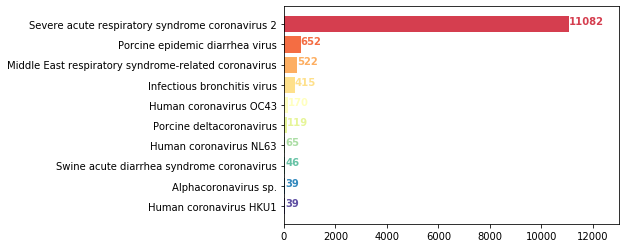

In [43]:
fig,ax = plt.subplots()
plt.xlim(0,13000)
ax.barh(top_ten,top_ten_df['accession'],color=list(colorMap['transform'].palette))
for i,v in enumerate(top_ten_df['accession']):
    ax.text(v+3,i,str(v), color=colorList[i], fontweight='bold')